In [17]:
from IPython.display import IFrame

IFrame(src='http://localhost:3000', width=700, height=420)

New lap!!!


In [14]:
import os, sys, time, datetime, json, random, socketio
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, PReLU
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

sio = socketio.Client()
sio.connect('http://localhost:3000')

class BrowserKartController():
    
    def __init__(self):
        self.x = 476
        self.y = 356
        self.col = self.x//20
        self.row = self.y//20
        #self.map = self.import_weights()
        self.n = 27
        self.map = self.clean_map()
        self.move = 1
        self.visited = []
        self.target = True
        self.nbActions = 4
        self.rotation = 2
    
    def update(self, positions):
        self.x = int(positions['x'])
        self.y = int(positions['y'])
        old_rotation = self.rotation
        old_row = self.row
        old_col = self.col
        old_move = self.move
        self.move = int(positions['move'])
        self.rotation = max(0,int(positions['rotation'])-1)//90
        if old_col > 19 and old_row == 13 and self.target:
            print("New lap!!!")
            self.visited = []
            self.target = False
        if old_col < 4 and old_row == 13 and not self.target:
            self.target = True
        if (old_row, old_col) not in self.visited:
            self.visited.append((old_row, old_col))
            self.map[(old_col, old_row, old_rotation, old_move)]=self.map[(old_col, old_row, old_rotation, old_move)]+10
        else:
            self.map[(old_col, old_row, old_move)]=self.map[(old_col, old_row, old_rotation, old_move)]-0.5
        # update values
        self.col = self.x//20
        self.row = self.y//20
    
    def gen_move(self):
        actions = [self.map[(self.col, self.row, self.rotation, k)] for k in range(3)]
        self.move = np.argmax(actions)
        #self.move = np.random.randint(3)
        return self.move
    
    def clean_map(self):
        dico = dict()
        for i in range(self.n):
            for j in range(self.n):
                for k in range(4):
                    for l in range(3):
                        dico[(i, j, k, l)]=0
        return dico
    
    def export_weights(self):
        date = str(datetime.datetime.now()).replace(' ','-').replace('.','-').replace(':','-')
        with open('./weights/values'+str(date)+'.txt','w') as f:
            for val in self.map:
                f.write(str(val[0])+','+str(val[1])+','+str(val[2])+','+str(val[3])+','+str(self.map[val])+'\n')
    
    def import_weights(self):
        list_names = sorted(os.listdir('./weights/'))
        name = list_names[len(list_names)-1]
        with open('./weights/'+str(name),'r') as f:
            dico = dict()
            lines = [line.split(',') for line in f]
            for line in lines:
                dico[(int(line[0]),int(line[1]),int(line[2]),int(line[3]))]=float(line[3].replace('\n',''))
        return dico
    
    def plot_res(self):
        move = np.zeros(self.n*self.n*3).reshape(self.n,self.n,3)
        for i in range(self.n):
            for j in range(self.n):
                move[i][j] = (np.mean([self.map[(i,j,l,0)] for l in range(4)]), 
                              np.mean([self.map[(i,j,l,1)] for l in range(4)]), 
                              np.mean([self.map[(i,j,l,2)] for l in range(4)]))
        sns.heatmap(move[:,:,0])
        plt.show()
        sns.heatmap(move[:,:,1])
        plt.show()
        sns.heatmap(move[:,:,2])
        plt.show()

b = BrowserKartController()


@sio.on('position')
def on_message(data):
    #print('I received a message!'+str(data))
    move = b.update(data)
    
#while True:
#    time.sleep(0.5)
#sio.emit('move', str(b.gen_move()))



In [18]:
b.map

{(0, 0, 0, 0): 0,
 (0, 0, 0, 1): 0,
 (0, 0, 0, 2): 0,
 (0, 0, 1, 0): 0,
 (0, 0, 1, 1): 0,
 (0, 0, 1, 2): 0,
 (0, 0, 2, 0): 0,
 (0, 0, 2, 1): 0,
 (0, 0, 2, 2): 0,
 (0, 0, 3, 0): 0,
 (0, 0, 3, 1): 0,
 (0, 0, 3, 2): 0,
 (0, 1, 0, 0): 0,
 (0, 1, 0, 1): 0,
 (0, 1, 0, 2): 0,
 (0, 1, 1, 0): 0,
 (0, 1, 1, 1): 0,
 (0, 1, 1, 2): 0,
 (0, 1, 2, 0): 0,
 (0, 1, 2, 1): 0,
 (0, 1, 2, 2): 0,
 (0, 1, 3, 0): 0,
 (0, 1, 3, 1): 0,
 (0, 1, 3, 2): 0,
 (0, 2, 0, 0): 0,
 (0, 2, 0, 1): 0,
 (0, 2, 0, 2): 0,
 (0, 2, 1, 0): 0,
 (0, 2, 1, 1): 0,
 (0, 2, 1, 2): 0,
 (0, 2, 2, 0): 0,
 (0, 2, 2, 1): 0,
 (0, 2, 2, 2): 0,
 (0, 2, 3, 0): 0,
 (0, 2, 3, 1): 0,
 (0, 2, 3, 2): 0,
 (0, 3, 0, 0): 0,
 (0, 3, 0, 1): 0,
 (0, 3, 0, 2): 0,
 (0, 3, 1, 0): 0,
 (0, 3, 1, 1): 0,
 (0, 3, 1, 2): 0,
 (0, 3, 2, 0): 0,
 (0, 3, 2, 1): 0,
 (0, 3, 2, 2): 0,
 (0, 3, 3, 0): 0,
 (0, 3, 3, 1): 0,
 (0, 3, 3, 2): 0,
 (0, 4, 0, 0): 0,
 (0, 4, 0, 1): 0,
 (0, 4, 0, 2): 0,
 (0, 4, 1, 0): 0,
 (0, 4, 1, 1): 0,
 (0, 4, 1, 2): 0,
 (0, 4, 2, 0): 0,
 (0, 4, 2,

In [10]:
12*27*27

8748

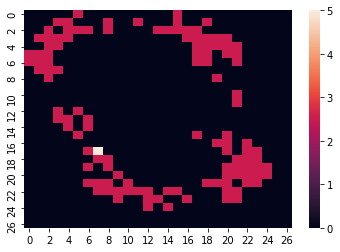

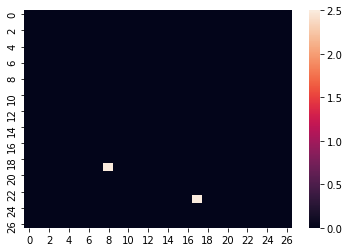

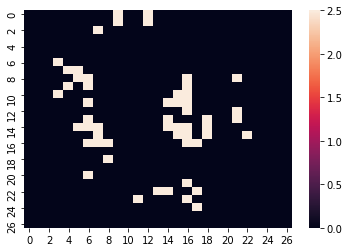

In [19]:
import seaborn as sns
b.plot_res()

In [ ]:
sorted(os.listdir('./weights/'))[0]

In [ ]:
b.col

In [ ]:
b.map[(10,10,0)]

In [ ]:
sio.emit('move',2)

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.cvtColor(cv2.imread("./media/map_1_modif.png"), cv2.COLOR_BGR2RGB)

xmax = img.shape[0]
ymax = img.shape[1]

plt.figure(figsize=(10,10))
n=27
#for i in range(n):
#    plt.hlines(i*20, linestyle = 'dashed', color="red", xmin=0, xmax=xmax)
#    plt.vlines(i*20, linestyle = 'dashed', color="red", ymin=0, ymax=ymax)
    
for col in range(n):
    for row in range(n):
        if col >19 and row == 13:
            plt.scatter(col*20,row*20,color="red")
        if col == 19 and row>=3 and row <=10:
            plt.scatter(col*20,row*20,color="red")
        if col == 5 and row<=4:
            plt.scatter(col*20,row*20,color="red")
        if col == 12 and row <10:
            plt.scatter(col*20,row*20,color="red")
        if col<5 and row == 6:
            plt.scatter(col*20,row*20,color="red")
        if col<5 and row == 13:
            plt.scatter(col*20,row*20,color="red")
        if col == 6 and row >=15 and row <23:
            plt.scatter(col*20,row*20,color="red")
        if col == 6 and row >=15 and row <23:
            plt.scatter(col*20,row*20,color="red")
        if col == 13 and row >12:
            plt.scatter(col*20,row*20,color="red")
        if col == 19 and row>=20:
            plt.scatter(col*20,row*20,color="red")
        if col > 19 and row==18:
            plt.scatter(col*20,row*20,color="red")
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.show()

In [ ]:
img.shape

In [ ]:
476//20

In [ ]:
maze = np.zeros(27*27).reshape(27,27)
for i in range(n-1):
    for j in range(n-1):
        if img[i*20][j*20][0] == 0 and img[i*20][j*20][1] == 168 and img[i*20][j*20][2] == 0:
            maze[i][j] = 1

In [ ]:
plt.imshow(maze)

In [ ]:
import os, sys, time, datetime, json, random, socketio
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, PReLU
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

sio = socketio.Client()
sio.connect('http://localhost:3000')

class BrowserKartController():
    
    def __init__(self):
        self.x = 476
        self.y = 356
        self.col = self.x//20
        self.row = self.y//20
        self.map = self.import_weights()
        self.move = 1
        self.visited = []
        self.target = True
    
    def update(self, positions):
        self.x = int(positions['x'])
        self.y = int(positions['y'])
        old_row = self.row
        old_col = self.col
        old_move = self.move
        if old_col > 19 and old_row == 13 and self.target:
            print("New lap!!!")
            self.visited = []
            self.target = False
        if old_col < 4 and old_row == 13 and not self.target:
            self.target = True
        if (old_row, old_col) not in self.visited:
            self.visited.append((old_row, old_col))
            self.map[(old_col, old_row, old_move)]=self.map[(old_col, old_row, old_move)]+1
        else:
            self.map[(old_col, old_row, old_move)]=self.map[(old_col, old_row, old_move)]-0.5
        # update values
        self.col = self.x//20
        self.row = self.y//20
    
    def gen_move(self):
        actions = [self.map[(self.col, self.row, k)] for k in range(3)]
        self.move = np.argmax(actions)
        #self.move = np.random.randint(3)
        return self.move
    
    def export_weights(self):
        date = str(datetime.datetime.now()).replace(' ','-').replace('.','-').replace(':','-')
        with open('./weights/values'+str(date)+'.txt','w') as f:
            for val in self.map:
                f.write(str(val[0])+','+str(val[1])+','+str(val[2])+','+str(self.map[val])+'\n')
    
    def import_weights(self):
        list_names = sorted(os.listdir('./weights/'))
        name = list_names[len(list_names)-1]
        with open('./weights/'+str(name),'r') as f:
            dico = dict()
            lines = [line.split(',') for line in f]
            for line in lines:
                dico[(int(line[0]),int(line[1]),int(line[2]))]=float(line[3].replace('\n',''))
        return dico

b = BrowserKartController()


@sio.on('position')
def on_message(data):
    #print('I received a message!'+str(data))
    move = b.update(data)
    
#while True:
#    time.sleep(0.5)
#sio.emit('move', str(b.gen_move()))



New lap!!!


### 